In [1]:
x=6
ss=0.1
for i in range(2000):
    slope=2*x
    x=x-ss*slope
x

9.080823493825418e-194

In [3]:
import pandas as pd
import numpy as np

df=pd.read_csv('advertising.csv')

In [5]:
def linear_regression(X,y,W,w0,iters=1000,ss=0.01):
    N=len(y)
    rss_l=[]
    for i in range(iters):
        y_pred=np.dot(X,W)+w0
        error=np.subtract(y,y_pred)
        rss=np.square(error).mean()
        
        w0_slope=-2*np.sum(error)/N
        W_slope=-2*np.dot(X.T,error)/N
        
        W=W-ss*W_slope
        w0=w0-ss*w0_slope
        rss_l.append(rss)
    return W,w0,rss_l

In [7]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X=scaler.fit_transform(df[['TV','Radio','Newspaper','Sales']])
W=np.zeros(X.shape[1])
w0=0
y=df['Sales'].values

W,W0,rss_l=linear_regression(X,y,W,w0)

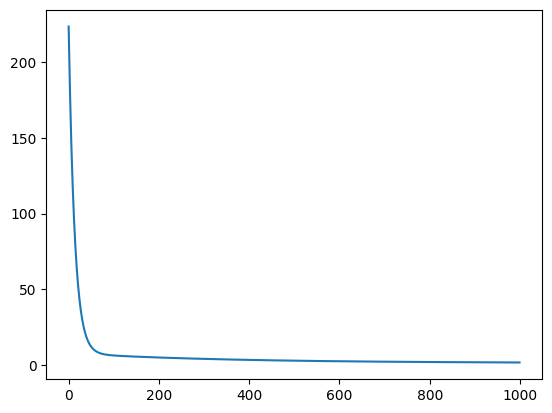

In [12]:
import matplotlib.pyplot as plt
plt.plot(rss_l)